Importing all library and modules that will be used throughout the project

In [1]:
import pandas as pd
import pickle
import os
import zipfile
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor


Read the training dataset from the CSV file and store it in a DataFrame.

In [2]:
dataset = pd.read_csv("C:\\Users\\user\\Downloads\\male_players (legacy).csv")
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_24104\312174987.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("C:\\Users\\user\\Downloads\\male_players (legacy).csv")


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


Split dataset into numerical and categorical features.

In [3]:
dataset.info()

numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
categorical_features = dataset.select_dtypes(include=['object'])

numerical_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,NaN,25,21,20,6,11,15,14,8,NaN
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,NaN,22,31,23,7,11,15,14,11,NaN
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,NaN,29,26,26,10,8,11,5,15,NaN
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,NaN,25,41,27,13,15,10,9,12,NaN
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,NaN,25,25,25,87,85,92,90,86,60.0


Drop numerical columns with over 30% missing values.

In [4]:
numerical_features = numerical_features.dropna(thresh=0.7*len(numerical_features), axis=1)
numerical_features.head()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,76,NaN,25,21,20,6,11,15,14,8
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,85,NaN,22,31,23,7,11,15,14,11
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,80,NaN,29,26,26,10,8,11,5,15
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,91,NaN,25,41,27,13,15,10,9,12
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,37,NaN,25,25,25,87,85,92,90,86


In [5]:
categorical_features.head()

,player_url,fifa_update_date,short_name,long_name,player_positions,dob,league_name,club_name,club_position,club_loaned_from,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,/player/158023/lionel-messi/150002,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,1987-06-24,La Liga,FC Barcelona,CF,NaN,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,/player/20801/c-ronaldo-dos-santos-aveiro/150002,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",1985-02-05,La Liga,Real Madrid CF,LW,NaN,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,/player/9014/arjen-robben/150002,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",1984-01-23,Bundesliga,FC Bayern München,SUB,NaN,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,/player/41236/zlatan-ibrahimovic/150002,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,1981-10-03,Ligue 1,Paris Saint-Germain,ST,NaN,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,/player/167495/manuel-neuer/150002,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,1986-03-27,Bundesliga,FC Bayern München,GK,NaN,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


Dropping columns with more than 30% missing values for the categorical features.

In [6]:
categorical_features.info()


categorical_features = categorical_features.dropna(thresh=0.7*len(categorical_features), axis=1)
categorical_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   player_url        161583 non-null  object
 1   fifa_update_date  161583 non-null  object
 2   short_name        161583 non-null  object
 3   long_name         161583 non-null  object
 4   player_positions  161583 non-null  object
 5   dob               161583 non-null  object
 6   league_name       159810 non-null  object
 7   club_name         159810 non-null  object
 8   club_position     159810 non-null  object
 9   club_loaned_from  9538 non-null    object
 10  club_joined_date  150272 non-null  object
 11  nationality_name  161583 non-null  object
 12  nation_position   9316 non-null    object
 13  preferred_foot    161583 non-null  object
 14  work_rate         161583 non-null  object
 15  body_type         161583 non-null  object
 16  real_face         161583 non-null  obj

,player_url,fifa_update_date,short_name,long_name,player_positions,dob,league_name,club_name,club_position,club_joined_date,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,/player/158023/lionel-messi/150002,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,1987-06-24,La Liga,FC Barcelona,CF,2004-07-01,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,/player/20801/c-ronaldo-dos-santos-aveiro/150002,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",1985-02-05,La Liga,Real Madrid CF,LW,2009-07-01,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,/player/9014/arjen-robben/150002,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",1984-01-23,Bundesliga,FC Bayern München,SUB,2009-08-28,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,/player/41236/zlatan-ibrahimovic/150002,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,1981-10-03,Ligue 1,Paris Saint-Germain,ST,2012-07-01,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,/player/167495/manuel-neuer/150002,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,1986-03-27,Bundesliga,FC Bayern München,GK,2011-07-01,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


Convert the `dob` column to `cat_age` and the `club_joined` column to `cat_years_in_club` by subtracting the respective years from the current year, as age and years in the club have more relational value than the years of birth and joining.

In [7]:
categorical_features['dob'] = pd.to_datetime(categorical_features['dob'])
categorical_features['club_joined'] = pd.to_datetime(categorical_features['club_joined_date'])

categorical_features['cat_age'] = categorical_features['dob'].apply(lambda x: 2023 - x.year)
categorical_features['cat_years_in_club'] = categorical_features['club_joined'].apply(lambda x: 2023 - x.year)

categorical_features = categorical_features.drop(['dob', 'club_joined_date'], axis=1)
categorical_features.head()

,player_url,fifa_update_date,short_name,long_name,player_positions,league_name,club_name,club_position,nationality_name,preferred_foot,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_joined,cat_age,cat_years_in_club
0,/player/158023/lionel-messi/150002,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,La Liga,FC Barcelona,CF,Argentina,Left,...,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,2004-07-01,36,19.0
1,/player/20801/c-ronaldo-dos-santos-aveiro/150002,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",La Liga,Real Madrid CF,LW,Portugal,Right,...,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,2009-07-01,38,14.0
2,/player/9014/arjen-robben/150002,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",Bundesliga,FC Bayern München,SUB,Netherlands,Left,...,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,2009-08-28,39,14.0
3,/player/41236/zlatan-ibrahimovic/150002,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,Ligue 1,Paris Saint-Germain,ST,Sweden,Right,...,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,2012-07-01,42,11.0
4,/player/167495/manuel-neuer/150002,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,Bundesliga,FC Bayern München,GK,Germany,Right,...,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,2011-07-01,37,12.0


Remove columns with over 90% unique values, as they do not offer learnable patterns for the model.

In [8]:
mostly_unique = [col for col in categorical_features.columns if categorical_features[col].nunique() >= 0.9 * len(categorical_features)]
categorical_features = categorical_features.drop(mostly_unique, axis=1)
categorical_features.head()

,fifa_update_date,short_name,long_name,player_positions,league_name,club_name,club_position,nationality_name,preferred_foot,work_rate,...,rwb,lb,lcb,cb,rcb,rb,gk,club_joined,cat_age,cat_years_in_club
0,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,La Liga,FC Barcelona,CF,Argentina,Left,Medium/Low,...,62+3,54+3,45+3,45+3,45+3,54+3,15+3,2004-07-01,36,19.0
1,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",La Liga,Real Madrid CF,LW,Portugal,Right,High/Low,...,63+3,57+3,52+3,52+3,52+3,57+3,16+3,2009-07-01,38,14.0
2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",Bundesliga,FC Bayern München,SUB,Netherlands,Left,High/Low,...,64+3,55+3,46+3,46+3,46+3,55+3,14+3,2009-08-28,39,14.0
3,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,Ligue 1,Paris Saint-Germain,ST,Sweden,Right,Medium/Low,...,61+3,56+3,55+3,55+3,55+3,56+3,17+3,2012-07-01,42,11.0
4,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,Bundesliga,FC Bayern München,GK,Germany,Right,Medium/Medium,...,36+3,36+3,38+3,38+3,38+3,36+3,87+3,2011-07-01,37,12.0


In [9]:
# dissplay the columns start from column 9 to column 36
for col in categorical_features.columns[9:36]:
    categorical_features[col] = categorical_features[col].apply(lambda x: int(x) if isinstance(x, (int, float)) else x)

categorical_features.head()

,fifa_update_date,short_name,long_name,player_positions,league_name,club_name,club_position,nationality_name,preferred_foot,work_rate,...,rwb,lb,lcb,cb,rcb,rb,gk,club_joined,cat_age,cat_years_in_club
0,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,La Liga,FC Barcelona,CF,Argentina,Left,Medium/Low,...,62+3,54+3,45+3,45+3,45+3,54+3,15+3,2004-07-01,36,19.0
1,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",La Liga,Real Madrid CF,LW,Portugal,Right,High/Low,...,63+3,57+3,52+3,52+3,52+3,57+3,16+3,2009-07-01,38,14.0
2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",Bundesliga,FC Bayern München,SUB,Netherlands,Left,High/Low,...,64+3,55+3,46+3,46+3,46+3,55+3,14+3,2009-08-28,39,14.0
3,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,Ligue 1,Paris Saint-Germain,ST,Sweden,Right,Medium/Low,...,61+3,56+3,55+3,55+3,55+3,56+3,17+3,2012-07-01,42,11.0
4,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,Bundesliga,FC Bayern München,GK,Germany,Right,Medium/Medium,...,36+3,36+3,38+3,38+3,38+3,36+3,87+3,2011-07-01,37,12.0


Remove club_logo_url, club_flag_url and national_flag_url columns.

In [10]:
columns_to_drop = ['club_logo_url', 'club_flag_url', 'nation_flag_url']
columns_to_keep = []

for col in columns_to_drop:
    if col in categorical_features.columns:
        columns_to_keep.append(col)

categorical_features = categorical_features.drop(columns_to_keep, axis=1)
categorical_features


,fifa_update_date,short_name,long_name,player_positions,league_name,club_name,club_position,nationality_name,preferred_foot,work_rate,...,rwb,lb,lcb,cb,rcb,rb,gk,club_joined,cat_age,cat_years_in_club
0,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,La Liga,FC Barcelona,CF,Argentina,Left,Medium/Low,...,62+3,54+3,45+3,45+3,45+3,54+3,15+3,2004-07-01,36,19.0
1,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",La Liga,Real Madrid CF,LW,Portugal,Right,High/Low,...,63+3,57+3,52+3,52+3,52+3,57+3,16+3,2009-07-01,38,14.0
2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",Bundesliga,FC Bayern München,SUB,Netherlands,Left,High/Low,...,64+3,55+3,46+3,46+3,46+3,55+3,14+3,2009-08-28,39,14.0
3,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,Ligue 1,Paris Saint-Germain,ST,Sweden,Right,Medium/Low,...,61+3,56+3,55+3,55+3,55+3,56+3,17+3,2012-07-01,42,11.0
4,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,Bundesliga,FC Bayern München,GK,Germany,Right,Medium/Medium,...,36+3,36+3,38+3,38+3,38+3,36+3,87+3,2011-07-01,37,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,2022-09-26,Zhao Ziye,赵梓业,RW,Super League,Hebei CFFC,RES,China PR,Right,Medium/Medium,...,37+2,36+2,31+2,31+2,31+2,36+2,14+2,2022-05-01,20,1.0
161579,2022-09-26,Wu Junjie,吴俊杰,LB,Super League,Guangzhou R&F,RES,China PR,Left,Medium/Medium,...,43+2,44+2,48+2,48+2,48+2,44+2,15+2,2022-05-01,20,1.0
161580,2022-09-26,K. Barlow,Kailin Barlow,CDM,Premier Division,Sligo Rovers,RES,Republic of Ireland,Right,High/Medium,...,47+2,47+2,46+2,46+2,46+2,47+2,14+2,2021-11-02,20,2.0
161581,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",Premier Division,Shamrock Rovers,RES,Republic of Ireland,Right,Medium/Medium,...,34+2,32+2,28+2,28+2,28+2,32+2,15+2,2022-06-24,18,1.0


Convert the remaining categorical features to numerical by factorizing.

In [11]:
encodings_map  = {}

for col in categorical_features.select_dtypes(include=['object']).columns:
    encoded_values, unique_categories = pd.factorize(categorical_features[col])
    encodings_map[col] = dict(zip(unique_categories, encoded_values))
    categorical_features[col] = encoded_values

categorical_features.head()

,fifa_update_date,short_name,long_name,player_positions,league_name,club_name,club_position,nationality_name,preferred_foot,work_rate,...,rwb,lb,lcb,cb,rcb,rb,gk,club_joined,cat_age,cat_years_in_club
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2004-07-01,36,19.0
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,2009-07-01,38,14.0
2,0,2,2,2,1,2,2,2,0,1,...,2,2,2,2,2,2,2,2009-08-28,39,14.0
3,0,3,3,3,2,3,3,3,1,0,...,3,3,3,3,3,3,3,2012-07-01,42,11.0
4,0,4,4,4,1,2,4,4,1,2,...,4,4,4,4,4,4,4,2011-07-01,37,12.0


Combine the numerical and categorical features to make one dataframe

In [12]:
dataset = pd.concat([numerical_features, categorical_features], axis=1)
dataset.head()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,rwb,lb,lcb,cb,rcb,rb,gk,club_joined,cat_age,cat_years_in_club
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,0,0,0,0,0,0,0,2004-07-01,36,19.0
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,1,1,1,1,1,1,1,2009-07-01,38,14.0
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,2,2,2,2,2,2,2,2009-08-28,39,14.0
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,3,3,3,3,3,3,3,2012-07-01,42,11.0
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,4,4,4,4,4,4,4,2011-07-01,37,12.0


In [13]:
dataset.columns

Index(['player_id', 'fifa_version', 'fifa_update', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       ...
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'club_joined', 'cat_age',
       'cat_years_in_club'],
      dtype='object', length=101)

Since age  calculated as (2023 - dob), we drop `age` feature from the dataset since `cat_age` accurately represents their current age.

In [14]:
dataset = dataset.drop('age', axis=1)

Assess feature importance using the Random Forest Regressor.

In [15]:
X = dataset.drop(['overall'], axis=1)
y = dataset['overall']

Imputing the missing values in the dataset by filling them with the mean of the column.

In [16]:
X_imputed = X.fillna(X.mean())
y_imputed = y

X_imputed.shape, y_imputed.shape

((161583, 99), (161583,))

In [17]:
import pandas as pd

X_imputed['club_joined'] = pd.to_datetime(X_imputed['club_joined'])

X_imputed['club_joined'] = X_imputed['club_joined'].astype('int64') // 10**9


In [ ]:
imputedRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
imputedRegressor.fit(X_imputed, y_imputed)

Showing the feature importance of the model in a dataframe format.

In [44]:
imputed_feature_importances = pd.DataFrame(imputedRegressor.feature_importances_, index=X_imputed.columns, columns=['importance']).sort_values('importance', ascending=False)
imputed_feature_importances *= 100
imputed_feature_importances.head()

,importance
value_eur,81.511095
cat_age,9.502507
potential,3.601742
movement_reactions,1.818856
long_name,1.654476


Retain only the important features for our X (independent variables).

In [45]:
y = y_imputed

X = imputed_feature_importances[imputed_feature_importances['importance'] > 1].index
X = X_imputed[X]
X.head()

,value_eur,cat_age,potential,movement_reactions,long_name
0,100500000.0,36,95,94,0
1,79000000.0,38,92,90,1
2,54500000.0,39,90,89,2
3,52500000.0,42,90,85,3
4,63500000.0,37,90,89,4


In [46]:
X.describe()

,value_eur,cat_age,potential,movement_reactions,long_name
count,1.615830e+05,161583.000000,161583.000000,161583.000000,161583.000000
mean,2.326770e+06,30.419642,70.744008,61.576824,19483.058236
std,5.967471e+06,5.259000,6.259121,9.170063,13491.449423
min,1.000000e+03,18.000000,40.000000,20.000000,0.000000
25%,3.250000e+05,27.000000,66.000000,55.000000,7634.500000
50%,7.500000e+05,30.000000,70.000000,62.000000,17889.000000
75%,1.900000e+06,34.000000,75.000000,68.000000,29929.000000
max,1.940000e+08,56.000000,95.000000,96.000000,50359.000000


Scaling the data using the StandardScaler.

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X.describe()


,value_eur,cat_age,potential,movement_reactions,long_name
count,1.615830e+05,1.615830e+05,1.615830e+05,1.615830e+05,1.615830e+05
mean,2.814327e-17,-2.420321e-16,-5.516080e-16,2.532894e-16,-6.754384e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.897425e-01,-2.361605e+00,-4.911888e+00,-4.533988e+00,-1.444109e+00
25%,-3.354480e-01,-6.502477e-01,-7.579375e-01,-7.172082e-01,-8.782299e-01
50%,-2.642283e-01,-7.979525e-02,-1.188681e-01,4.614767e-02,-1.181536e-01
75%,-7.151624e-02,6.808080e-01,6.799685e-01,7.004527e-01,7.742663e-01
max,3.211978e+01,4.864126e+00,3.875315e+00,3.753876e+00,2.288563e+00


Splitting the data for training and testing using the train_test_split function from sklearn.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((129266, 5), (129266,), (32317, 5), (32317,))

Training the models with 16 different regression models and comparing their performance

In [49]:
regression_models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'BayesianRidge': BayesianRidge(),
    'HuberRegressor': HuberRegressor(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'MLPRegressor': MLPRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'XGBRegressor': XGBRegressor()
}

mse = {}
mae = {}
r2 = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse[name] = mean_squared_error(y_test, y_pred)
    mae[name] = mean_absolute_error(y_test, y_pred)
    r2[name] = r2_score(y_test, y_pred)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Converting perfomance data into a dataframe 

In [50]:
accuracy = pd.DataFrame([mse, mae, r2], index=['MSE', 'MAE', 'R2']).T
accuracy = accuracy.sort_values('R2', ascending=False)
accuracy

,MSE,MAE,R2
RandomForestRegressor,0.391114,0.363223,0.992109
ExtraTreesRegressor,0.439507,0.397095,0.991132
XGBRegressor,0.590996,0.554670,0.988076
DecisionTreeRegressor,0.725168,0.393895,0.985369
MLPRegressor,0.876687,0.667829,0.982312
GradientBoostingRegressor,1.116292,0.804467,0.977478
SVR,1.860987,0.857351,0.962452
KNeighborsRegressor,2.566251,1.066040,0.948223
AdaBoostRegressor,4.550041,1.761937,0.908198
BayesianRidge,6.577804,2.009875,0.867285


Plot the accuracy of the models

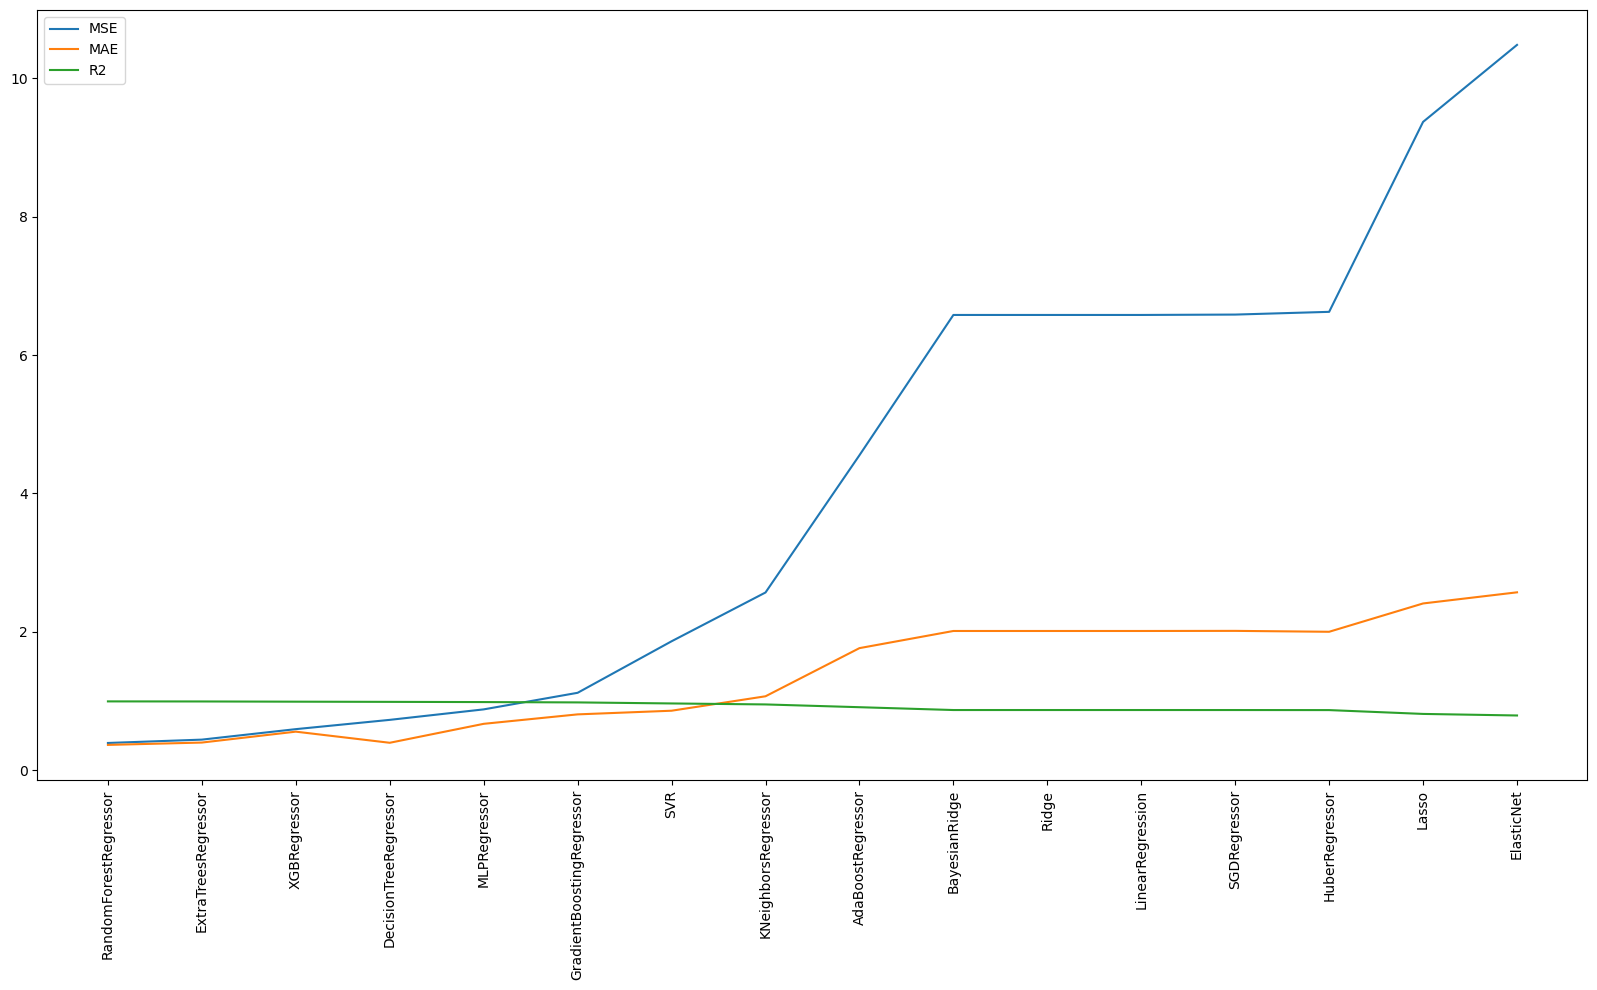

In [51]:
plt.figure(figsize=(20, 10))
plt.plot(accuracy['MSE'], label='MSE')
plt.plot(accuracy['MAE'], label='MAE')
plt.plot(accuracy['R2'], label='R2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Given that the Random Forest Regressor shows the lowest mean absolute error and the highest R2 score, we will proceed with this algorithm. Next, we need to optimize the model's hyperparameters for optimal performance and train it on the entire training dataset.

Training the model using the best parameters and the entire training dataset.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 200), 
    'max_depth': [None, 5],  
    'min_samples_split': randint(2, 5),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['sqrt', 'log2']  
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,  
    random_state=42,
    n_jobs=-1,
    verbose=1
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])


random_search.fit(X, y)

print(random_search.best_params_)


Read the test dataset from the CSV file and store it in a DataFrame.

In [ ]:
model_with_best_params = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500, n_jobs=-1, random_state=42)
model_with_best_params.fit(X, y)

In [1]:
test_data = pd.read_csv("C:\\Users\\user\\Downloads\\players_22.csv")
test_data.head()

Compute the current age of the players in the test dataset, which corresponds to the cat_age feature in the training dataset.

In [ ]:
test_data['cat_age'] = 2023 - pd.to_datetime(test_data.dob).dt.year
test_data.cat_age.head()

Create a subset of the data containing only the columns used for training the model.

In [ ]:
needed_columns = ['value_eur','release_clause_eur','cat_age','potential','movement_reactions']
test_features = test_data[needed_columns]
test_features.head()

In [ ]:
test_features.info()

In [ ]:
test_overall = test_data.overall
test_overall.head()

Fill in the missing values in the dataset by replacing them with the mean value of each respective column.

In [ ]:
test_features = test_features.fillna(test_features.mean())

In [ ]:
test_features.head()

Scale the data using the previously saved StandardScaler object.

In [ ]:
with open('scaler_model.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)  # Load the saved scaler
test_features = loaded_scaler.transform(test_features)

Predicting the overall rating of the players in the test dataset.

In [ ]:
y_predicion = model_with_best_params.predict(test_features)
y_predicion

Printing the metrics of the model.

In [ ]:
mae = mean_absolute_error(test_overall, y_predicion)
r2 = r2_score(test_overall, y_predicion)
mse = mean_squared_error(test_overall, y_predicion)

print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MSE: {mse}')

Visualize the actual and predicted values to observe their correlation by using graph(by plotting )

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_overall, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Player')
plt.ylabel('Overall')
plt.legend()
plt.show()

In [ ]:
comparison = pd.DataFrame({'Actual': test_overall, 'Predicted': y_pred})
comparison.tail(10)

The model achieves an excellent R2 score of 0.978 and a very low mean absolute error of 0.69.

Saving the model for deployment in the web app using pickle.

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model_with_best_params, f)

To reduce its size to less than 100MB for uploading to GitHub, we will compress the large raw model (over 300MB) using gzip.

In [ ]:
zip_filename = "model.zip"
model_filename = "model.pkl"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as archive:
    archive.write(model_filename)

print(f"{model_filename} has been zipped to {zip_filename}")

Deleting the raw model to save space.

In [ ]:
file_path = 'model.pkl'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been removed")